## **TELCO CUSTOMER CHURN DATASET**

### **MODEL BUILDING**

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv('/content/telco_churn_data.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure-group_1 - 12,tenure-group_13 - 24,tenure-group_25 - 36,tenure-group_37 - 48,tenure-group_49 - 60,tenure-group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [30]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure-group_1 - 12,tenure-group_13 - 24,tenure-group_25 - 36,tenure-group_37 - 48,tenure-group_49 - 60,tenure-group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


### **Creating the data and the label**

In [31]:
data = df.drop('Churn', axis=1)
label = df['Churn']

data.shape,label.shape

((7032, 50), (7032,))

### **Splitting dataset into train and test data**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.2)
x_train.shape

(5625, 50)

### **ANN Model**

In [34]:
import tensorflow as tf
from tensorflow import keras

def model():
  model = keras.Sequential([
                              keras.layers.Dense(20,input_shape=(50,),activation='relu'),
                              keras.layers.Dense(1,activation='sigmoid'),
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

**Training the initial ANN model**

In [35]:
model_ANN = model()
model_ANN.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 23.9723 - accuracy: 0.6142
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5613 - accuracy: 0.7492
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.6666 - accuracy: 0.7511
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5015 - accuracy: 0.7813
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5455 - accuracy: 0.7819
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5440 - accuracy: 0.7835
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4828 - accuracy: 0.7835
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4954 - accuracy: 0.7851
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5824 - accuracy: 0.7780
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5094 - accur

In [36]:
model_ANN.evaluate(x_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 1.1309 - accuracy: 0.7818


[1.1309202909469604, 0.7818052768707275]

In [37]:
predictions=model_ANN.predict(x_test)
y_pred=[]
for p in predictions:
  if p>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1038
           1       0.73      0.27      0.39       369

    accuracy                           0.78      1407
   macro avg       0.76      0.62      0.63      1407
weighted avg       0.77      0.78      0.74      1407



### **Upsampling of data**

In [39]:
from imblearn.combine import SMOTEENN

In [40]:
sm=SMOTEENN()
x_upsampled,y_upsampled=sm.fit_resample(data,label)

In [41]:
x_upsampled.shape,y_upsampled.shape

((5822, 50), (5822,))

In [42]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_upsampled,y_upsampled,test_size=0.2)

**Training the same model after upsampling**

In [43]:
model = model()
model.fit(xr_train,yr_train,epochs=100)

Epoch 1/100
146/146 [==============================] - 1s 4ms/step - loss: 4.9698 - accuracy: 0.7543
Epoch 2/100
146/146 [==============================] - 1s 4ms/step - loss: 0.3819 - accuracy: 0.8731
Epoch 3/100
146/146 [==============================] - 1s 4ms/step - loss: 0.4490 - accuracy: 0.8752
Epoch 4/100
146/146 [==============================] - 1s 4ms/step - loss: 0.2748 - accuracy: 0.8969
Epoch 5/100
146/146 [==============================] - 1s 4ms/step - loss: 0.3375 - accuracy: 0.8920
Epoch 6/100
146/146 [==============================] - 1s 4ms/step - loss: 0.2605 - accuracy: 0.9096
Epoch 7/100
146/146 [==============================] - 1s 4ms/step - loss: 0.2755 - accuracy: 0.9132
Epoch 8/100
146/146 [==============================] - 1s 4ms/step - loss: 0.2167 - accuracy: 0.9205
Epoch 9/100
146/146 [==============================] - 1s 4ms/step - loss: 0.2969 - accuracy: 0.9083
Epoch 10/100
146/146 [==============================] - 1s 4ms/step - loss: 0.2671 - accura

In [44]:
model.evaluate(xr_test,yr_test)

37/37 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.9073


[0.38628092408180237, 0.9072961211204529]

In [45]:
predictions_new=model.predict(xr_test)
yr_pred=[]
for p in predictions_new:
  if p>0.5:
    yr_pred.append(1)
  else:
    yr_pred.append(0)

print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       513
           1       0.97      0.86      0.91       652

    accuracy                           0.91      1165
   macro avg       0.91      0.91      0.91      1165
weighted avg       0.92      0.91      0.91      1165



### **Trying a new fine tuned model**

In [55]:
def model2():
  model = keras.Sequential([
                              keras.layers.Dense(30,input_shape=(50,),activation='relu'),
                              keras.layers.Dense(15,activation='relu'),
                              keras.layers.Dense(1,activation='sigmoid'),
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [56]:
model2=model2()
model2.fit(xr_train,yr_train,epochs=200)

Epoch 1/200
146/146 [==============================] - 1s 4ms/step - loss: 24.6433 - accuracy: 0.6313
Epoch 2/200
146/146 [==============================] - 1s 4ms/step - loss: 0.8715 - accuracy: 0.8117
Epoch 3/200
146/146 [==============================] - 1s 4ms/step - loss: 0.4851 - accuracy: 0.8729
Epoch 4/200
146/146 [==============================] - 1s 4ms/step - loss: 0.4414 - accuracy: 0.8742
Epoch 5/200
146/146 [==============================] - 1s 4ms/step - loss: 0.4537 - accuracy: 0.8793
Epoch 6/200
146/146 [==============================] - 1s 4ms/step - loss: 0.3941 - accuracy: 0.8965
Epoch 7/200
146/146 [==============================] - 1s 4ms/step - loss: 0.2862 - accuracy: 0.9070
Epoch 8/200
146/146 [==============================] - 1s 4ms/step - loss: 0.2121 - accuracy: 0.9227
Epoch 9/200
146/146 [==============================] - 1s 4ms/step - loss: 0.4679 - accuracy: 0.8952
Epoch 10/200
146/146 [==============================] - 1s 4ms/step - loss: 0.5756 - accur

In [57]:
model2.evaluate(xr_test,yr_test)

37/37 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9408


[0.14362238347530365, 0.940772533416748]

In [63]:
predictions_new=model2.predict(xr_test)
yr_pred=[]
for p in predictions_new:
  if p>0.5:
    yr_pred.append(1)
  else:
    yr_pred.append(0)

print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       513
           1       0.95      0.94      0.95       652

    accuracy                           0.94      1165
   macro avg       0.94      0.94      0.94      1165
weighted avg       0.94      0.94      0.94      1165



## **Final model**

In [65]:
final_model = model2
final_model.evaluate(xr_test,yr_test)

37/37 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9408


[0.14362238347530365, 0.940772533416748]

### **Classification report**

In [66]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       513
           1       0.95      0.94      0.95       652

    accuracy                           0.94      1165
   macro avg       0.94      0.94      0.94      1165
weighted avg       0.94      0.94      0.94      1165



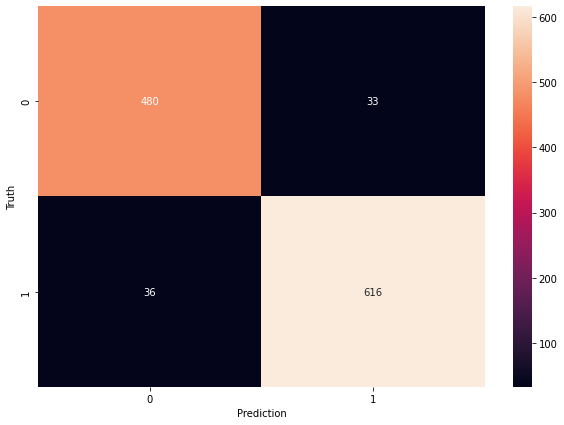

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

con_mat = tf.math.confusion_matrix(labels = yr_test,predictions = yr_pred)

plt.figure(figsize=(10,7))
sns.heatmap(con_mat,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

### **Saving the model**

In [69]:
import pickle

file_path='model.sav'
pickle.dump(final_model,open(file_path,'wb'))

INFO:tensorflow:Assets written to: ram://4f5e99da-1f14-4f4d-977a-2d0be7d7bcdc/assets


In [70]:
loaded_model = pickle.load(open(file_path,'rb'))
loaded_model.evaluate(xr_test,yr_test)

37/37 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9408


[0.14362238347530365, 0.940772533416748]

In [71]:
xr_train.to_csv('X_train.csv')
xr_test.to_csv('X_test.csv')
yr_train.to_csv('Y_train.csv')
yr_test.to_csv('Y_test.csv')